In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.cifar10.load_data()

In [3]:
np.shape(X_train_full)

(50000, 32, 32, 3)

In [4]:
X_train = X_train_full[:40000]/255
X_val = X_train_full[40000:]/255

y_train = y_train_full[:40000]
y_val = y_train_full[40000:]

In [5]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_val_scaled = (X_val - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [33]:
model1 = keras.models.Sequential()
model1.add(keras.layers.Flatten(input_shape=[32,32,3]))
for layers in range(20):
    model1.add(keras.layers.Dense(100, activation='elu', kernel_initializer='HeNormal'))
model1.add(keras.layers.Dense(10, activation="softmax"))


In [34]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)

In [35]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [31]:
model1.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Nadam(learning_rate=1e-3), 
               metrics = 'accuracy')
expon_lr = ExponentialLearningRate(factor=1.005)

In [32]:
history = model1.fit(X_train_scaled, y_train, epochs=1,
                    validation_data=(X_val_scaled, y_val),
                    callbacks=[expon_lr])

ValueError: in user code:

    C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\keras\engine\training.py:853 train_function  *
        return step_function(self, iterator)
    C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\keras\engine\training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\keras\engine\training.py:835 run_step  **
        outputs = model.train_step(data)
    C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\keras\engine\training.py:787 train_step
        y_pred = self(x, training=True)
    C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\keras\engine\base_layer.py:1037 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\keras\engine\sequential.py:369 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\keras\engine\functional.py:414 call
        return self._run_internal_graph(
    C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\keras\engine\functional.py:550 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\keras\engine\base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\jeffa\Anaconda3\envs\tf2\lib\site-packages\keras\engine\input_spec.py:250 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer dense is incompatible with the layer: expected axis -1 of input shape to have value 1024 but received input with shape (32, 3072)


Text(0, 0.5, 'Loss')

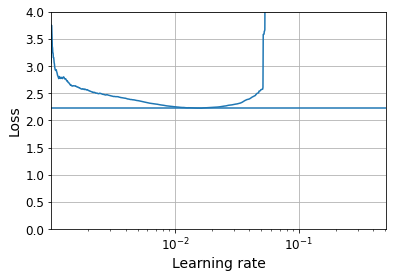

In [26]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, 4])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

In [22]:
expon_lr.rates[210]

0.008081417

In [ ]:
keras.backend.clear_session()
model1.reset_states()


In [36]:
model1.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Nadam(learning_rate=5e-5), 
               metrics = 'accuracy')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)

history = model1.fit(X_train, y_train, epochs=100,
                    validation_data=(X_val, y_val),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
1250/1250 [==============================] - 61s 47ms/step - loss: 1.9493 - accuracy: 0.2952 - val_loss: 1.7789 - val_accuracy: 0.3576
Epoch 2/100
1250/1250 [==============================] - 59s 47ms/step - loss: 1.7277 - accuracy: 0.3768 - val_loss: 1.7100 - val_accuracy: 0.3901
Epoch 3/100
1250/1250 [==============================] - 58s 46ms/step - loss: 1.6453 - accuracy: 0.4076 - val_loss: 1.6311 - val_accuracy: 0.4176
Epoch 4/100
1250/1250 [==============================] - 58s 47ms/step - loss: 1.5838 - accuracy: 0.4298 - val_loss: 1.6149 - val_accuracy: 0.4179
Epoch 5/100
1250/1250 [==============================] - 57s 46ms/step - loss: 1.5382 - accuracy: 0.4441 - val_loss: 1.5789 - val_accuracy: 0.4371
Epoch 6/100
1250/1250 [==============================] - 54s 43ms/step - loss: 1.5054 - accuracy: 0.4594 - val_loss: 1.5896 - val_accuracy: 0.4344
Epoch 7/100
1250/1250 [==============================] - 52s 41ms/step - loss: 1.4746 - accuracy: 0.4716 - val_loss: 1

<AxesSubplot:>

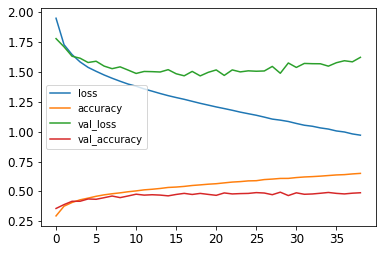

In [37]:
import pandas as pd

pd.DataFrame(history.history).plot()

In [58]:
model2 = keras.models.Sequential()
model2.add(keras.layers.Flatten(input_shape=[32,32,3]))
for layers in range(20):
    model2.add(keras.layers.Dense(100, kernel_initializer='HeNormal'))
    model2.add(keras.layers.BatchNormalization())
    model2.add(keras.layers.Activation("elu"))
model2.add(keras.layers.Dense(10, activation="softmax"))

model2.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Nadam(learning_rate=1e-5), 
               metrics = 'accuracy')
expon_lr = ExponentialLearningRate(factor=1.01)

In [56]:
history = model2.fit(X_train_scaled, y_train, epochs=1,
                    validation_data=(X_val_scaled, y_val),
                    callbacks=[expon_lr])

1250/1250 [==============================] - 147s 114ms/step - loss: 37.0723 - accuracy: 0.1952 - val_loss: 628420.8125 - val_accuracy: 0.1022


Text(0, 0.5, 'Loss')

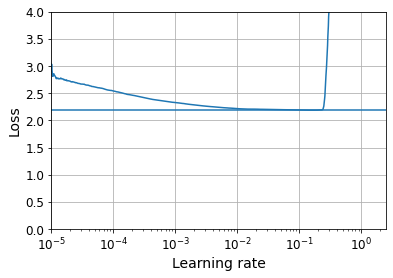

In [57]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, 4])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

In [53]:
expon_lr.rates[1028]

0.27692914

In [59]:
model2.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Nadam(learning_rate=1e-3), 
               metrics = 'accuracy')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("CIFAR10_model2.h5", save_best_only=True)

history = model2.fit(X_train, y_train, epochs=100,
                    validation_data=(X_val, y_val),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
1250/1250 [==============================] - 141s 109ms/step - loss: 1.8467 - accuracy: 0.3356 - val_loss: 1.8515 - val_accuracy: 0.3452
Epoch 2/100
1250/1250 [==============================] - 134s 107ms/step - loss: 1.6892 - accuracy: 0.3983 - val_loss: 2.0812 - val_accuracy: 0.3135
Epoch 3/100
1250/1250 [==============================] - 123s 98ms/step - loss: 1.6259 - accuracy: 0.4207 - val_loss: 1.6859 - val_accuracy: 0.4026
Epoch 4/100
1250/1250 [==============================] - 137s 110ms/step - loss: 1.5803 - accuracy: 0.4382 - val_loss: 1.6887 - val_accuracy: 0.3965
Epoch 5/100
1250/1250 [==============================] - 126s 101ms/step - loss: 1.5315 - accuracy: 0.4512 - val_loss: 1.5932 - val_accuracy: 0.4408
Epoch 6/100
1250/1250 [==============================] - 149s 119ms/step - loss: 1.4968 - accuracy: 0.4677 - val_loss: 1.6441 - val_accuracy: 0.4228
Epoch 7/100
1250/1250 [==============================] - 134s 107ms/step - loss: 1.4603 - accuracy: 0.4848 

<AxesSubplot:>

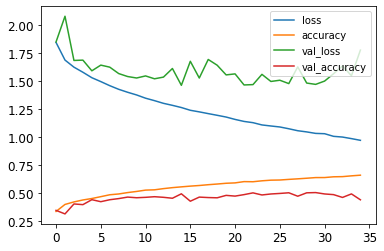

In [60]:
pd.DataFrame(history.history).plot()

In [73]:
model3 = keras.models.Sequential()
model3.add(keras.layers.Flatten(input_shape=[32,32,3]))
for layers in range(20):
    model3.add(keras.layers.Dense(100, activation ='selu', kernel_initializer='lecun_normal'))    
model3.add(keras.layers.Dense(10, activation="softmax"))

model3.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Nadam(learning_rate=1e-5), 
               metrics = 'accuracy')
expon_lr = ExponentialLearningRate(factor=1.01)

In [64]:
history = model3.fit(X_train_scaled, y_train, epochs=1,
                    validation_data=(X_val_scaled, y_val),
                    callbacks=[expon_lr])

1250/1250 [==============================] - 60s 46ms/step - loss: 130288972401527458106571449434112.0000 - accuracy: 0.1576 - val_loss: 751130718697990862863647446663168.0000 - val_accuracy: 0.1014


Text(0, 0.5, 'Loss')

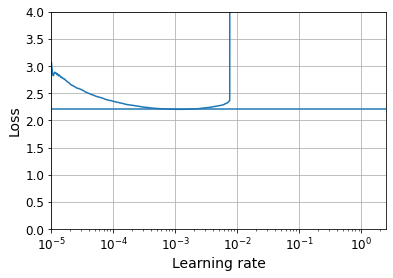

In [65]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, 4])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

In [70]:
model3.reset_metrics()
model3.reset_states()
keras.backend.clear_session()

In [74]:
model3.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Nadam(learning_rate=1e-4), 
               metrics = 'accuracy')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("CIFAR10_model3.h5", save_best_only=True)

history = model3.fit(X_train, y_train, epochs=100,
                    validation_data=(X_val, y_val),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
1250/1250 [==============================] - 62s 47ms/step - loss: 1.9153 - accuracy: 0.3029 - val_loss: 1.7650 - val_accuracy: 0.3561
Epoch 2/100
1250/1250 [==============================] - 57s 45ms/step - loss: 1.7210 - accuracy: 0.3785 - val_loss: 1.7266 - val_accuracy: 0.3824
Epoch 3/100
1250/1250 [==============================] - 59s 47ms/step - loss: 1.6470 - accuracy: 0.4086 - val_loss: 1.6236 - val_accuracy: 0.4247
Epoch 4/100
1250/1250 [==============================] - 61s 49ms/step - loss: 1.5869 - accuracy: 0.4295 - val_loss: 1.5961 - val_accuracy: 0.4230
Epoch 5/100
1250/1250 [==============================] - 59s 48ms/step - loss: 1.5401 - accuracy: 0.4457 - val_loss: 1.6162 - val_accuracy: 0.4248
Epoch 6/100
1250/1250 [==============================] - 59s 48ms/step - loss: 1.5005 - accuracy: 0.4592 - val_loss: 1.6250 - val_accuracy: 0.4176
Epoch 7/100
1250/1250 [==============================] - 60s 48ms/step - loss: 1.4720 - accuracy: 0.4721 - val_loss: 1

In [77]:
model4 = keras.models.Sequential()
model4.add(keras.layers.Flatten(input_shape=[32,32,3]))
model4.add(keras.layers.AlphaDropout(0.2, seed=6))
for layers in range(20):
    model4.add(keras.layers.Dense(100, activation ='selu', kernel_initializer='lecun_normal'))  
    model4.add(keras.layers.AlphaDropout(0.2, seed=6))
    
model4.add(keras.layers.Dense(10, activation="softmax"))

model4.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Nadam(learning_rate=1e-5), 
               metrics = 'accuracy')
expon_lr = ExponentialLearningRate(factor=1.01)

In [78]:
history = model4.fit(X_train_scaled, y_train, epochs=1,
                    validation_data=(X_val_scaled, y_val),
                    callbacks=[expon_lr])

1250/1250 [==============================] - 69s 53ms/step - loss: nan - accuracy: 0.1039 - val_loss: nan - val_accuracy: 0.1014


Text(0, 0.5, 'Loss')

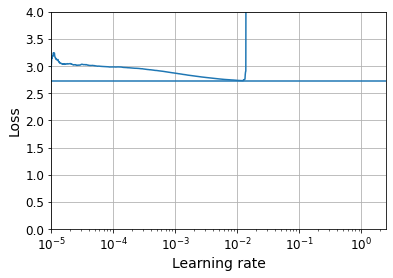

In [79]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, 4])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

In [85]:
model4 = keras.models.Sequential()
model4.add(keras.layers.Flatten(input_shape=[32,32,3]))
for layers in range(20):
    model4.add(keras.layers.Dense(100, activation ='selu', kernel_initializer='lecun_normal'))  
    
model4.add(keras.layers.AlphaDropout(0.1, seed=6))
model4.add(keras.layers.Dense(10, activation="softmax"))


In [86]:
model4.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Nadam(learning_rate=5e-4), 
               metrics = 'accuracy')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("CIFAR10_model3.h5", save_best_only=True)

history = model4.fit(X_train, y_train, epochs=100,
                    validation_data=(X_val, y_val),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
1250/1250 [==============================] - 63s 49ms/step - loss: 2.0924 - accuracy: 0.2364 - val_loss: 1.9449 - val_accuracy: 0.2881
Epoch 2/100
1250/1250 [==============================] - 55s 44ms/step - loss: 1.8673 - accuracy: 0.3211 - val_loss: 1.8700 - val_accuracy: 0.3341
Epoch 3/100
1250/1250 [==============================] - 58s 47ms/step - loss: 1.7828 - accuracy: 0.3567 - val_loss: 1.7572 - val_accuracy: 0.3742
Epoch 4/100
1250/1250 [==============================] - 55s 44ms/step - loss: 1.7193 - accuracy: 0.3801 - val_loss: 1.6879 - val_accuracy: 0.3944
Epoch 5/100
1250/1250 [==============================] - 56s 45ms/step - loss: 1.6721 - accuracy: 0.4008 - val_loss: 1.7052 - val_accuracy: 0.3942
Epoch 6/100
1250/1250 [==============================] - 57s 45ms/step - loss: 1.6344 - accuracy: 0.4153 - val_loss: 1.6615 - val_accuracy: 0.4143
Epoch 7/100
1250/1250 [==============================] - 60s 48ms/step - loss: 1.6057 - accuracy: 0.4294 - val_loss: 1

In [88]:
class MCAlphaDropout(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)
    

model5 = keras.models.Sequential([
    MCAlphaDropout(layer.rate) if isinstance(layer, keras.layers.AlphaDropout) else layer for layer in model4.layers
])



In [89]:
def mc_dropout_predict_probas(mc_model, X, n_samples=10):
    Y_probas = [mc_model.predict(X) for sample in range(n_samples)]
    return np.mean(Y_probas, axis=0)

def mc_dropout_predict_classes(mc_model, X, n_samples=10):
    Y_probas = mc_dropout_predict_probas(mc_model, X, n_samples)
    return np.argmax(Y_probas, axis=1)

In [91]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

y_pred = mc_dropout_predict_classes(model5, X_val_scaled)
accuracy = np.mean(y_pred == y_val[:, 0])
accuracy

0.2512

In [144]:
model6 = keras.models.Sequential()
model6.add(keras.layers.Flatten(input_shape=[32,32,3]))
for layers in range(20):
    model6.add(keras.layers.Dense(100, activation ='selu', kernel_initializer='lecun_normal'))  
    
model6.add(keras.layers.AlphaDropout(0.1))
model6.add(keras.layers.Dense(10, activation="softmax"))

model6.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-2), 
               metrics = 'accuracy')
expon_lr = ExponentialLearningRate(factor=1.005)

In [94]:
history = model6.fit(X_train_scaled, y_train, epochs=1,
                    validation_data=(X_val_scaled, y_val),
                    callbacks=[expon_lr])

1250/1250 [==============================] - 64s 50ms/step - loss: 54796356819949375453252691165184.0000 - accuracy: 0.1218 - val_loss: 594467162960104784323415021453312.0000 - val_accuracy: 0.0997


Text(0, 0.5, 'Loss')

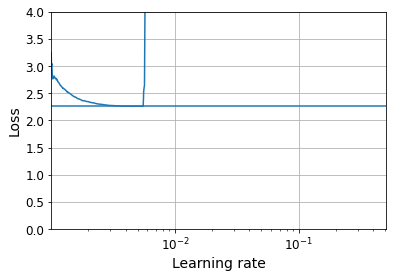

In [95]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, 4])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

In [145]:
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.learning_rate, rate)

In [146]:
n_epochs = 15
batch_size =128
onecycle = OneCycleScheduler(np.ceil(len(X_train) / batch_size) * n_epochs, max_rate=0.1)
history = model6.fit(X_train_scaled, y_train, epochs=n_epochs, batch_size = batch_size,
                    validation_data=(X_val_scaled, y_val),
                    callbacks=[onecycle, checkpoint_cb, early_stopping_cb])

Epoch 1/15
313/313 [==============================] - 4s 13ms/step - loss: 2.0218 - accuracy: 0.2890 - val_loss: 1.8126 - val_accuracy: 0.3564
Epoch 2/15
313/313 [==============================] - 4s 13ms/step - loss: 1.7366 - accuracy: 0.3862 - val_loss: 1.8275 - val_accuracy: 0.3576
Epoch 3/15
313/313 [==============================] - 4s 13ms/step - loss: 1.6252 - accuracy: 0.4246 - val_loss: 1.7499 - val_accuracy: 0.4176
Epoch 4/15
313/313 [==============================] - 4s 13ms/step - loss: 1.5665 - accuracy: 0.4427 - val_loss: 1.6464 - val_accuracy: 0.4259
Epoch 5/15
313/313 [==============================] - 4s 12ms/step - loss: 1.5226 - accuracy: 0.4622 - val_loss: 1.7671 - val_accuracy: 0.4163
Epoch 6/15
313/313 [==============================] - 4s 13ms/step - loss: 1.4994 - accuracy: 0.4694 - val_loss: 1.7059 - val_accuracy: 0.4212
Epoch 7/15
313/313 [==============================] - 4s 13ms/step - loss: 1.4690 - accuracy: 0.4825 - val_loss: 1.6816 - val_accuracy: 0.4445

In [147]:
y_prob=model6.predict(X_test_scaled)

In [148]:
y_pred = np.argmax(y_prob, axis=1)

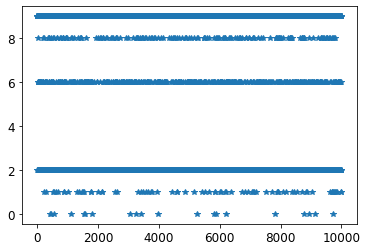

In [149]:
import matplotlib.pyplot as plt

plt.plot(y_pred, '*')

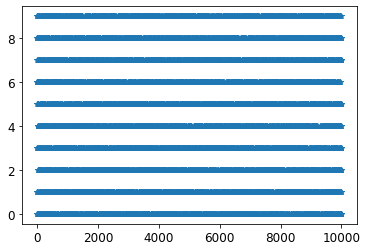

In [134]:
plt.plot(y_test,  '*')